In [1]:
RUN_RFC = True
RUN_LOGREG = True
RUN_KNN = False
RUN_SVC = False

# A. *Business Understanding*

Cardiovascular disease is the term for all types of diseases that affect the heart and/or blood vessels, including coronary heart disease (clogged arteries), which can cause heart attacks, stroke, congenital heart defects and peripheral artery disease. According to the *National Heart, Lung, and Blood Insitute (NHLBI)*, more than 800,000 people die of cardiovascular disease every year in the United States alone. 

> *As part of an initiative to reduce the number of deaths related to cardiovascular disease in the United States, the *U.S. Department of Health and Human Services (HHS)* have allocated funding for the development of a machine learning model that can accurately predict whether or not a patient is at risk for cardiovascular disease. The eventual goal is to deploy such a model and integrate it into the major EHR systems as a preliminary screening tool for cardiovascular disease. They also request that the most important features be identified.*

# B. *Data Understanding*

## B.1 - Overview of the Dataset

> *The dataset describes basic medical information for 69,301 patients. In addition to being factors that contribute to cardiovascular disease, __the features of this dataset were chosen for their simplicity and the fact that they can be easily and quickly obtained in a medical setting__. As a result, they fall under 3 basic categories with respect to their origin:*
> * _Objective Patient Information:_ basic information about the patient that can be verified as truth (*i.e. age, height, weight, and gender*)
> * _Subjective Patient Information:_ basic information about the patient that cannot be verified, but is accepted as truth (*i.e. whether or not the patient smokes, drinks alcohol, or is physically active*)
> * _Measurement:_ simple blood measurements (*e.g. blood pressure, cholesterol and glucose levels*)

> __The dataset consists of 11 input features and 1 target variable:__

> * __age__ *[int | continuous] - patient's age (years)*
> * __height__ *[int | continuous] - patient's height (cm)* 
> * __weight__ *[float | continuous] - patient's weight (kg)* 
> * __gender__ *[int | categorical] - patient's gender*
>   - *1 = male*
>   - *2 = female*
> * __bp_hi__ *[int | continuous] - patient's systolic blood pressure*
> * __bp_lo__ *[int | continuous] - patient's diastolic blood pressure*
> * __cholesterol__ *[int | categorical] - patient's cholesterol level*
>   - *1 = normal*
>   - *2 = high*
>   - *3 = very high*
> * __glucose__ *[int | categorical] - patient's glucose level* 
>   - *1 = normal*
>   - *2 = high*
>   - *3 = very high*
> * __smoking__ *[bool] - indicates whether or not the patient is a smoker*
>   - *0 = patient is a non-smoker*
>   - *1 = patient is a smoker*
> * __alcohol__ *[bool] - indicates whether or not the patient drinks alcohol*
>   - *0 = patient dos not drink alcohol*
>   - *1 = patient drinks alcohol*
> * __active__ *[bool] - indicates whether or not the patient is physically active*
>   - *0 = patient is not physically active*
>   - *1 = patient is physically active*

---

> * __[Target Variable]__ __cardio__ *[bool]  - indicates the presence or absence of cardiovascular disese in the pateint*
>   - *0 = patient does not suffer from cardiovascular disease*
>   - *1 = patient suffers from cardiovascular disease*


## B.2 - Importing the Dataset

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")

## B.3 - Viewing the Summary of the Dataset

The dataset resides in the `cardio_disease_data.csv` file located in the `data` directory of this project. The `id` column was dropped because it is not relevant to the target variable.

In [3]:
df = pd.read_csv("data/cardio_disease_data.csv").drop(columns="id")

> From the summary below, we can see that:
> * _the dataset does not contain any null (`NaN`) values_ 
> * _all column are of the appropriate data type_

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   bp_hi        69301 non-null  int64  
 5   bp_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   glucose      69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alcohol      69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


## B.4 - Inspecting the Numerical Predictors

*The unique set of values in each of the continuous numerical columns are shown below:* 

In [5]:
for col in ['age', 'bp_lo', 'bp_hi', 'height', 'weight']:
    print(f"{col}:\n{sorted(df[col].unique())}")
    print('---\n')

age:
[30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
---

bp_lo:
[-70, 0, 1, 6, 7, 8, 9, 10, 15, 20, 30, 40, 45, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120, 121, 122, 125, 126, 130, 135, 140, 150, 160, 170, 180, 182, 190, 585, 602, 700, 708, 709, 710, 800, 801, 802, 809, 810, 820, 850, 870, 880, 900, 901, 902, 910, 1000, 1001, 1002, 1003, 1007, 1008, 1011, 1022, 1033, 1044, 1077, 1088, 1100, 1101, 1110, 1111, 1120, 1125, 1139, 1140, 1177, 1200, 1211, 1400, 1900, 2088, 5700, 6800, 7099, 7100, 8000, 8044, 8077, 8079, 8099, 8100, 8200, 8500, 9011, 9100, 9800, 10000, 11000]
---

bp_hi:
[-150, -140, -120, -115, -100, 1, 7, 10, 11, 12, 13, 14, 15, 16, 17, 20, 24, 60, 70, 80, 85, 90

> *Given the fact that that the patients in the dataset range from 35 to 60 years old, the outliers listed below give rise to alarming discrepencies*:
> - *heights under $120\ cm\ (\approx 4\ ft)$ and above $245\ cm\ (\approx\ 8\ ft)$*  
> - *weights under $30\ kg\ (\approx 66\ lbs)$*
> - *diastolic (`bp_lo`) and systolic (`bp_hi`) blood pressures:* 
>   - *less than $0\ mmHg$ (physically impossible)* 
>   - *under $30\ mmHg$ (extremely unlikely)*
>   - *above $500\ mmHg$ (a person would explode - cusing death)*

*The distributions of the `bp_lo`, `bp_hi`, `height`, and `weight` columns are shown graphichally below:*

<AxesSubplot:title={'center':'Distribution of Diastolic (bp_lo) & Systolic (bp_hi) Blood Pressure Values'}, xlabel='BP [$mm\\ Hg$]', ylabel='Density'>

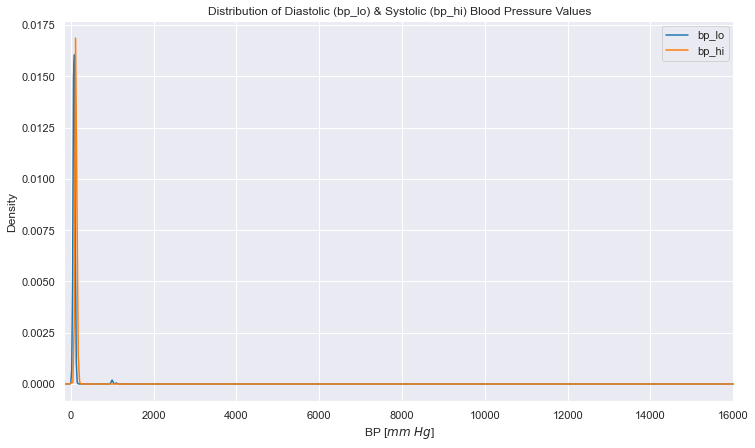

In [6]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Diastolic (bp_lo) & Systolic (bp_hi) Blood Pressure Values',
       xlabel=r'BP [$mm\ Hg$]',
       xlim=(min(df.bp_lo.min(), df.bp_hi.min()), max(df.bp_lo.max(), df.bp_hi.max())))
             
df.plot(y=['bp_lo', 'bp_hi'], 
        kind='density', 
        ax=ax)

<AxesSubplot:title={'center':'Distribution of Height Values'}, xlabel='Height [$cm$]', ylabel='Density'>

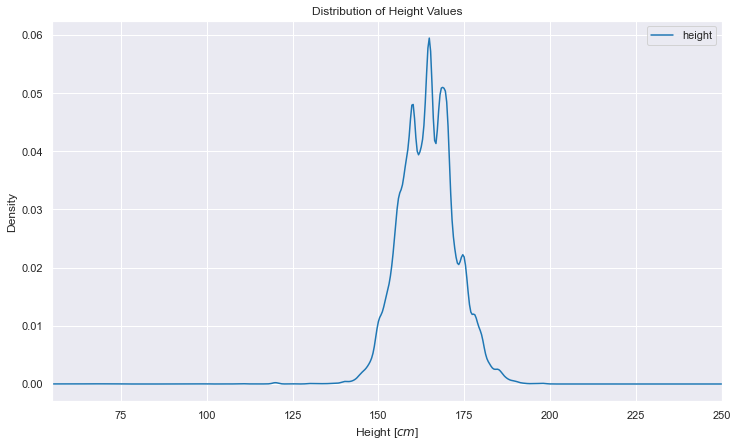

In [7]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Height Values',
       xlabel=r'Height [$cm$]',
       xlim=(min(df.height), max(df.height)))

df.plot(y='height', 
        kind='density',
        ax=ax) 

<AxesSubplot:title={'center':'Distribution of Weight Values'}, xlabel='Weight [$cm$]', ylabel='Density'>

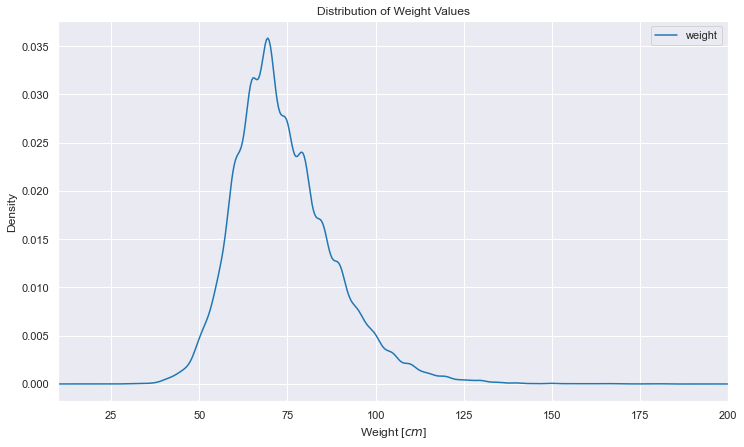

In [8]:
fig, ax = plt.subplots(figsize=(12,7))

ax.set(title='Distribution of Weight Values',
       xlabel=r'Weight [$cm$]',
       xlim=(min(df.weight), max(df.weight)))

df.plot(y='weight', 
        kind='density',
        ax=ax) 

> *The plots above confirm that these features have significant outliers that require removal. They also indicate that the `bp_lo`, `bp_hi`, `height`, and `weight` features are not normally distributed throughout the dataset:*
> - *`bp_lo`, `bp_hi` are extremely right-skewed*
> - *`height` is left-skewed with a jagged curve at the median* 
> - *`weight` is right-skewed with a jagged curve at the median* 

# C. *Data Preparation*

## C.1 - Data Cleaning

### *C.1.1 - Removing Entries Containing Negative Blood Pressure Values*

*It is reasonable to assume that negative blood pressure values are to be interpreted as null values, and the corresponding entries will therefore be discarded.*

In [9]:
df = df.loc[(df['bp_lo'] > 0) & (df['bp_hi'] > 0)]

### *C.1.2 - Removing Outliers*

> *Since `bp_lo`, `bp_hi`, `height`, and `weight` all have non-normal distributions, their outliers will be removed using the median as the measure of central tendency and IQR as the measure of dispersion.*.

In [10]:
def remove_outliers(df, *col_names, N=1.5, left_only=False, right_only=False):
    """
    Removes outliers in DataFrame columns using the IQR method.

    Arguments:
        df {pandas.DataFrame} -- [DataFrame to be passed in]
        col_names {Iterable[str]} -- [columns in `df` containing outliers to be removed]
        left_only {bool} -- only remove outliers with values less than the median
        right_only {bool} -- only remove outliers with values greater than the median
        
    Keyword Arguments:
        N {float} -- [factor that changes the width of the bounds used to determine outliers] (default: {1.5})

    Returns:
        df {pandas.DataFrame}
    """ 
    if left_only and right_only:
        raise ValueError("only one of <left_only, right_only> can be set to True")   
    for col in col_names:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        median = df[col].median()
        low_bound, high_bound = (median - N*IQR, median + N*IQR)
        if left_only:
            df = df.loc[(low_bound <= df[col])]
        elif right_only:
            df = df.loc[(df[col] <= high_bound)] 
        else:               
            df = df.loc[(low_bound <= df[col]) & (df[col] <= high_bound)]
    return df

#### *`bp_lo`* & *`bp_hi`*

In [11]:
# df.plot(y=['bp_lo', 'bp_hi'], 
#         kind='density', 
#         xlim=(0, max(df.bp_lo.max(), df.bp_hi.max())), 
#         figsize=(12,7))

In [12]:
df = remove_outliers(df, 'bp_lo', 'bp_hi', N=2.5)

In [13]:
# fig, ax = plt.subplots(figsize=(12,7))

# ax.set(title='Distribution of Diastolic (bp_lo) & Systolic (bp_hi) Blood Pressure Values',
#        xlabel=r'BP [$mm\ Hg$]',
#        xlim=(min(df.bp_lo.min(), df.bp_hi.min()), max(df.bp_lo.max(), df.bp_hi.max())))
             
# df.plot(y=['bp_lo', 'bp_hi'], 
#         kind='density', 
#         ax=ax)

In [14]:
df.shape

(66617, 12)

#### *`height`*

In [15]:
# fig, ax = plt.subplots(figsize=(12,7))

# ax.set(title='Distribution of Height Values',
#        xlabel=r'Height [$cm$]',
#        xlim=(min(df.height), max(df.height)))

# df.plot(y='height', 
#         kind='density',
#         ax=ax) 

In [16]:
df = remove_outliers(df, 'height', N=3)

In [17]:
# fig, ax = plt.subplots(figsize=(12,7))

# ax.set(title='Distribution of Height Values',
#        xlabel=r'Height [$cm$]',
#        xlim=(min(df.height), max(df.height)))

# df.plot(y='height', 
#         kind='density',
#         ax=ax) 

In [18]:
df.shape

(66518, 12)

#### *`weight`*

In [19]:
# fig, ax = plt.subplots(figsize=(12,7))

# ax.set(title='Distribution of Weight Values',
#        xlabel=r'Weight [$kg$]',
#        xlim=(min(df.weight), max(df.weight)))

# df.plot(y='weight', 
#         kind='density',
#         ax=ax) 

*As discussed in *Section B*, the distribution of weights only contains abnormally low values. Therefore, only outliers to the left of the median will be removed.*

In [20]:
df = remove_outliers(df, 'weight', N=2.5, left_only=True)

In [21]:
# fig, ax = plt.subplots(figsize=(12,7))

# ax.set(title='Distribution of Weight Values',
#        xlabel=r'Weight [$kg$]',
#        xlim=(min(df.weight), max(df.weight)))

# df.plot(y='weight', 
#         kind='density',
#         ax=ax) 

In [22]:
df.shape

(66513, 12)

## C.2 - Feature Engineering

In [23]:
df = df.reset_index(drop=True)

In [24]:
y = df["cardio"]
X = df.drop(columns="cardio")

In [25]:
X.shape, y.shape

((66513, 11), (66513,))

### *C.2.1 - Creating the __`bmi`__ and __`bmi_category`__ Features*

> *__Obesity is known to have a causal link with cardiovascular disease.__ This condition is categorized by a patient's __Body Mass Index (BMI)__ for each patient in the dataset, and then using this BMI to determine the patient's weight category.* 

> - *BMI will be calculated using the following formula:* 
> $$ BMI = \dfrac{weight(kg)}{[height(m)]^2} $$
> - *Using BMI, a patient's weight class will be determined from the following table:*
<br>
> <center><img src="./images/obesity_index.jpg" width='400'></center>

In [26]:
X['bmi'] = X.weight / (X.height/100)**2

In [27]:
X.drop(columns=['weight', 'height'], inplace=True)

In [28]:
def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif (18.5 <= bmi < 25):
        return 'normal'
    elif (25 <= bmi < 30):
        return 'overweight'
    elif (30 <= bmi < 35):
        return 'obese'
    elif (35 <= bmi < 40):
        return 'severley obese'
    else:
        return 'morbidly obese'

In [29]:
X['bmi_category'] = X['bmi'].apply(get_bmi_category) 
X['bmi_category'] = pd.Categorical(X['bmi_category'], 
                                   ordered=True, 
                                   categories=['underweight', 
                                               'normal', 
                                               'overweight', 
                                               'obese', 
                                               'severley obese', 
                                               'morbidly obese'])

X['bmi_category'].value_counts().sort_index(ascending=True)

underweight         619
normal            24941
overweight        23916
obese             11461
severley obese     3998
morbidly obese     1578
Name: bmi_category, dtype: int64

### *C.2.2 - Creating the __`bp_category`__ Feature*

> *__Hypertension is also known to have a causal link with cardiovascular disease.__ This condition is categorized a patient's blood pressure level, which will be determined from the following table:*
<br>
> <center><img src="images/bp_index.jpg" width='600'></center>


In [30]:
def get_bp_category(bp):
    bp_hi, bp_lo = bp
    if (bp_hi < 120 and bp_lo < 80):
        return 'normal'
    elif (120 <= bp_hi < 130) and (bp_lo < 80):
        return 'elevated'
    elif (130 <= bp_hi < 140) or (80 <= bp_lo < 90):
        return 'hypertension (stage 1)'
    else:
        return 'hypertension (stage 2)'

In [31]:
X['bp_category'] = X[['bp_hi', 'bp_lo']].apply(lambda x: tuple(x), axis=1).apply(get_bp_category)
X['bp_category'] = pd.Categorical(X['bp_category'], ordered=True, categories=['normal', 'elevated', 'hypertension (stage 1)', 'hypertension (stage 2)'])
X['bp_category'].value_counts().sort_index(ascending=True) 

normal                     9393
elevated                   3062
hypertension (stage 1)    39256
hypertension (stage 2)    14802
Name: bp_category, dtype: int64

## C.3 - One Hot Encoding the Categorical Features

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
X['gender'] = pd.Categorical(X['gender'].map({1: 'male', 2: 'female'}))
X['gender'].value_counts()

male      43416
female    23097
Name: gender, dtype: int64

In [34]:
X['cholesterol'] = pd.Categorical(X['cholesterol'].map({1: 'normal', 2: 'high', 3: 'very high'}), ordered=True, categories=['normal', 'high', 'very high'])
X['cholesterol'].value_counts().sort_index(ascending=True)

normal       50141
high          8868
very high     7504
Name: cholesterol, dtype: int64

In [35]:
X['glucose'] = pd.Categorical(X['glucose'].map({1: 'normal', 2: 'high', 3: 'very high'}), ordered=True, categories=['normal', 'high', 'very high'])
X['glucose'].value_counts().sort_index(ascending=True)

normal       56694
high          4807
very high     5012
Name: glucose, dtype: int64

In [36]:
X_num = X.select_dtypes(exclude='category')
X_cat = X.select_dtypes(include='category')

In [37]:
ohe = OneHotEncoder(sparse=False, dtype='int64')
ohe.fit(X_cat)
ohe_cols = ohe.get_feature_names(input_features=X_cat.columns)
X_cat = pd.DataFrame(ohe.transform(X_cat), columns=ohe_cols)
cat_cols = [col.replace(' ', '-').replace('(', '').replace(')', '') for col in ohe_cols]
X_cat.columns = cat_cols

In [38]:
X = pd.concat([X_num, X_cat], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66513 entries, 0 to 66512
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               66513 non-null  int64  
 1   bp_hi                             66513 non-null  int64  
 2   bp_lo                             66513 non-null  int64  
 3   smoke                             66513 non-null  int64  
 4   alcohol                           66513 non-null  int64  
 5   active                            66513 non-null  int64  
 6   bmi                               66513 non-null  float64
 7   gender_female                     66513 non-null  int64  
 8   gender_male                       66513 non-null  int64  
 9   cholesterol_high                  66513 non-null  int64  
 10  cholesterol_normal                66513 non-null  int64  
 11  cholesterol_very-high             66513 non-null  int64  
 12  gluc

## C.4 - Extracting the Training, Validation, and Testing Sets

In [39]:
from sklearn.model_selection import train_test_split

*The normalized value counts of the target array shown below indicate there is a roughly equal number of each label. Therefore, sampling will not need to be performed.*

In [40]:
y.value_counts(normalize=True)

0    0.512291
1    0.487709
Name: cardio, dtype: float64

In [41]:
X_train, X_validate_and_test, y_train, y_validate_and_test = train_test_split(X, y, random_state=0, test_size=0.20)
X_test, X_validate, y_test, y_validate = train_test_split(X_validate_and_test, y_validate_and_test, random_state=0, test_size=0.50)

In [42]:
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)
print(X_test.shape, y_test.shape)

(53210, 25) (53210,)
(6652, 25) (6652,)
(6651, 25) (6651,)


## C.5 - Normalizing the Predictors

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_validate = pd.DataFrame(scaler.transform(X_validate), columns=X_validate.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# D. *Modeling*

In [93]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict
from classifier_utils import validate, plot_validation_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

## Creating a Custom Scorer

In [46]:
from sklearn.metrics import fbeta_score, make_scorer

def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='binary')

f2 = make_scorer(f2_score)

## Fitting a Random Forest Classifier

In [47]:
def avg_depth(rfc):
    return round(np.average([dt.get_depth() for dt in rfc.estimators_]), 0)

### *Training an Overfitted Random Forest Classifier*

> *An overfitted Random Forest Classifier will be trained in order to extract an upper bound for the average depth of a randomized forest with respect to this dataset.*

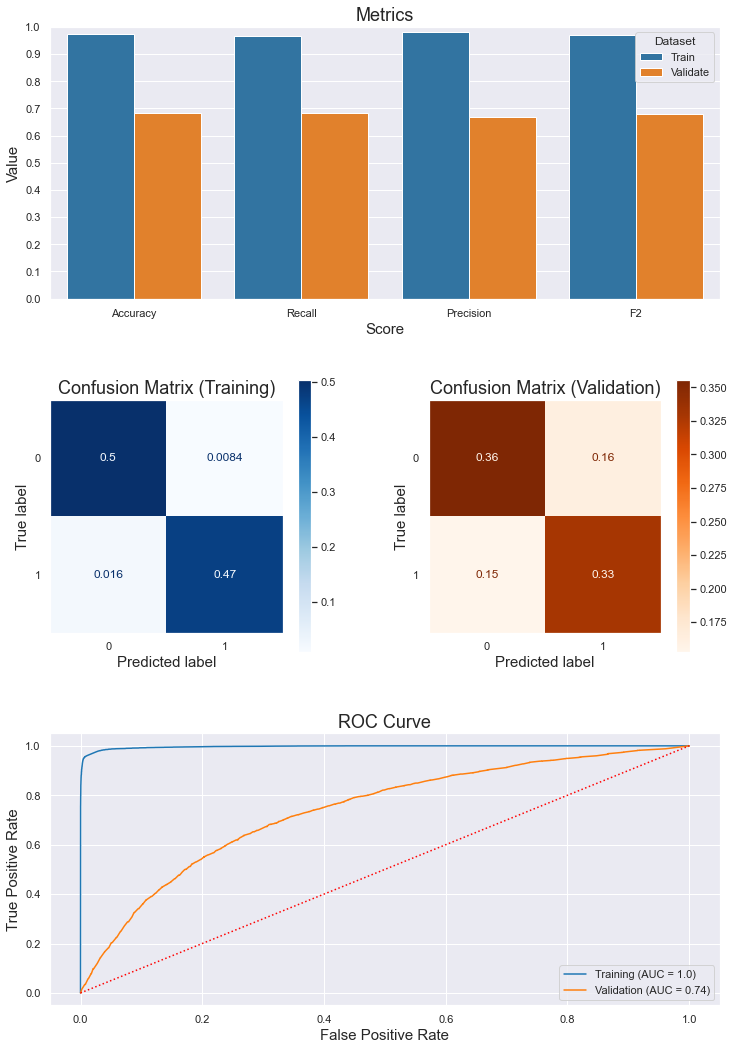

In [48]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rfc_base = rfc.fit(X_train, y_train)
validate(rfc_base, X_train, X_validate, y_train, y_validate)

### Optimizing the Maximum Depth (`max_depth`)

*Specifying the maximum depth of `rfc_base` limits the growth of its decision trees and prevents overfitting to the training set. The `max_depth` parameter will be optimized for this purpose.*

*The plot below shows how the validation metrics change as the depth of `rfc_base` increases:*

In [49]:
# plot_validation_curve(rfc_base, X_train, y_train, param_name='max_depth', param_range=np.arange(1, avg_depth(rfc)/2)) 

*The plots above indicate that overfitting begins to occur in `rfc_base` when its decision tress reach an average depth of 9 nodes. Therefore, a parameter grid for `max_depth` will be set up that centers around this value.*

In [50]:
max_depth_params = np.arange(1, avg_depth(rfc)/2)

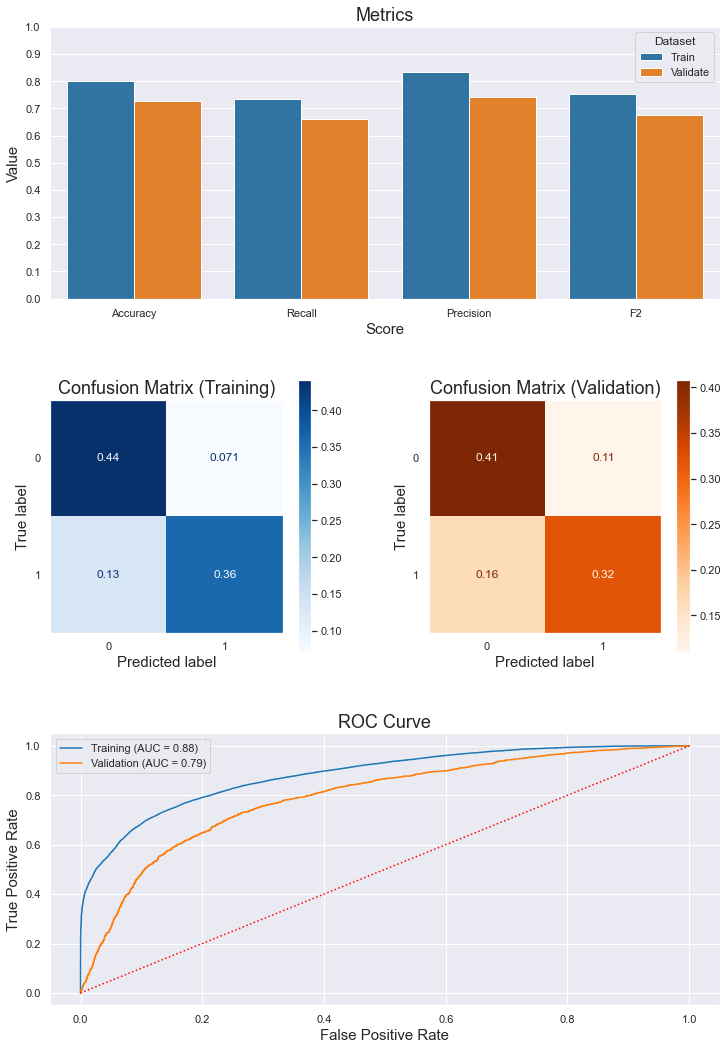

In [51]:
rfc_params = {'max_depth': max_depth_params}

rfc_grid = GridSearchCV(rfc_base, 
                        rfc_params,
                        scoring=f2, 
                        n_jobs=-1)
rfc_grid.fit(X_train, y_train)
    
validate(rfc_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [52]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=15.0, n_jobs=-1, random_state=0)

*The validation metrics above illustrate that the parameter grid search yielded an overfitted estimator. To further reduce overfitting, the maximum depth of `rfc` will manually be set to 10 in accordance to the validation metrics above.*

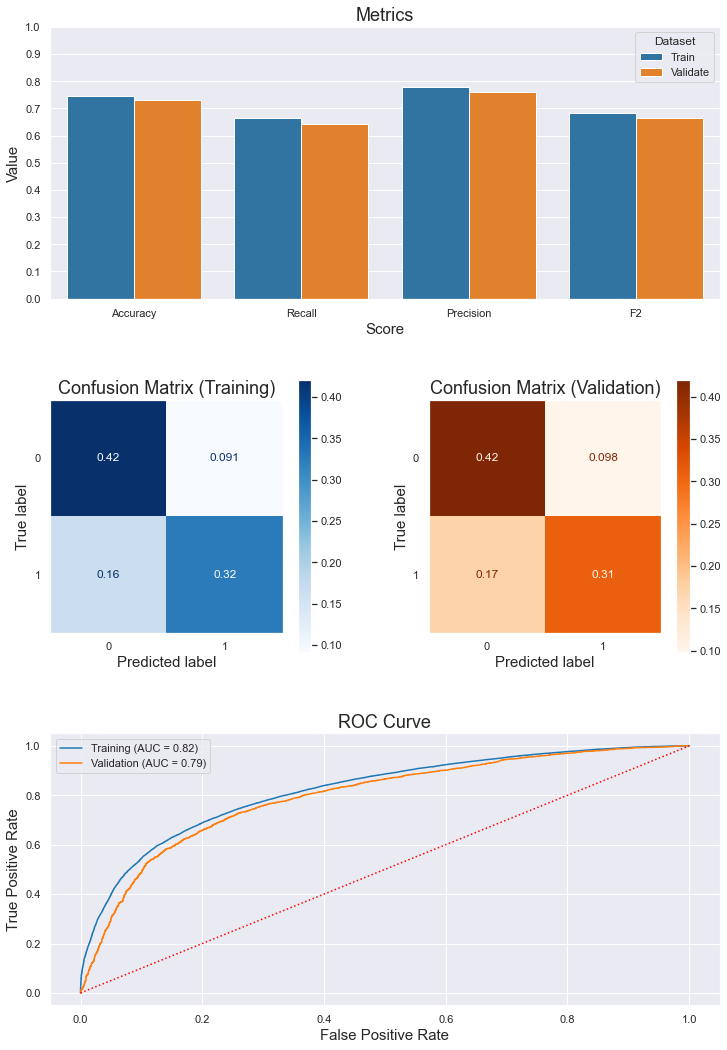

In [53]:
rfc.max_depth = 10    
validate(rfc, X_train, X_validate, y_train, y_validate)

In [54]:
rfc_bestMaxDepth = rfc
rfc_bestMaxDepth

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=0)

*The validation metrics above confirm that a maximum depth of 10 leads to a minimum in the training loss.*

### *Optimizing the Minimum Number of Samples per Leaf (`min_samples_leaf`)*

*Specifying the minimum samples required for a node to be considered a leaf is an alternative way to reduce overfitting in tree-based models.* 

In [55]:
rfc.max_depth = None

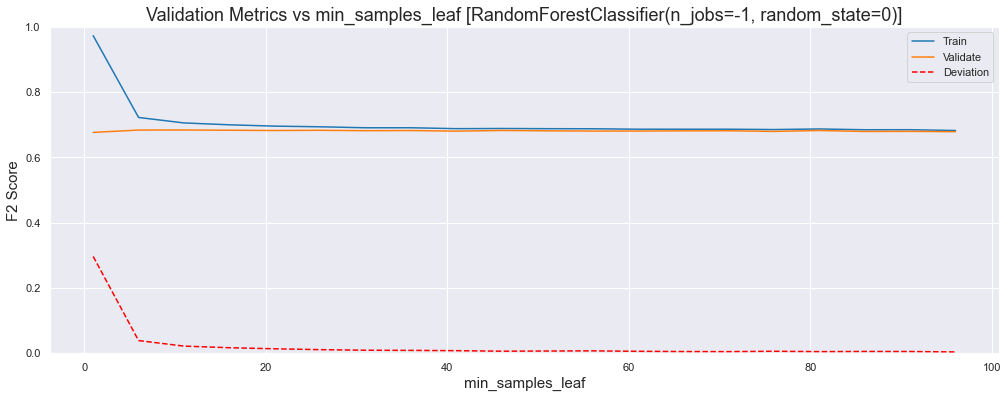

In [56]:
plot_validation_curve(rfc_base, X_train, y_train, param_name='min_samples_leaf', param_range=np.arange(1, 101, 5)) 

In [57]:
min_samples_leaf_params = np.arange(20, 101)

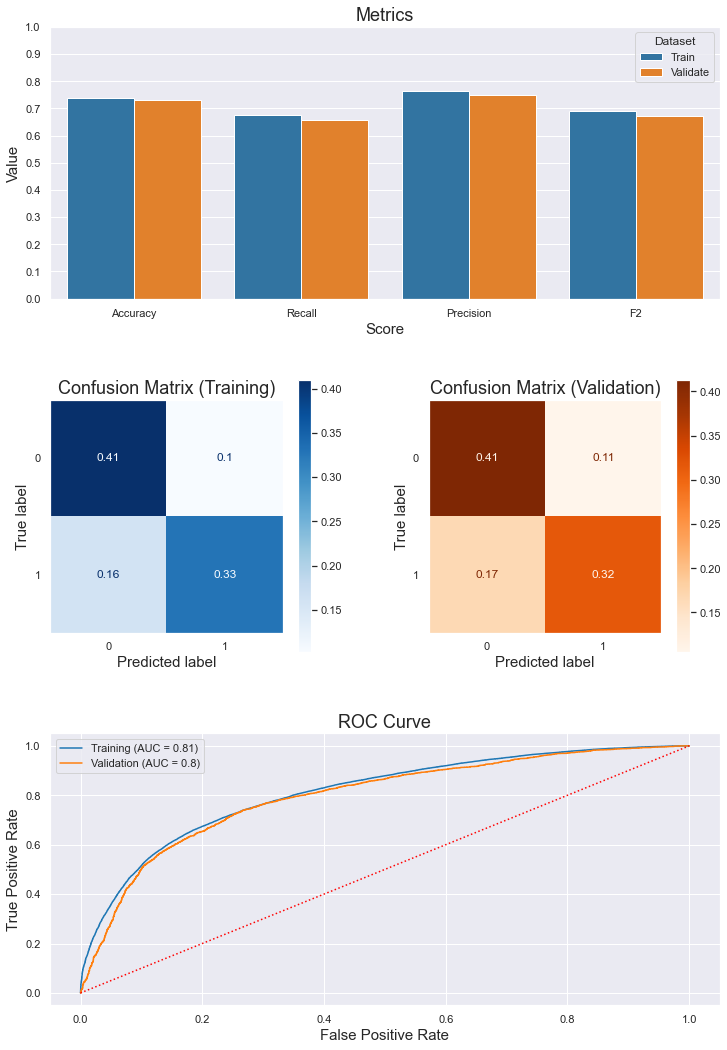

In [58]:

rfc_params = {'min_samples_leaf': min_samples_leaf_params}

rfc_grid = RandomizedSearchCV(rfc_base, 
                              rfc_params,
                              n_iter=50,
                              scoring=f2, 
                              n_jobs=-1)
rfc_grid.fit(X_train, y_train)
    
validate(rfc_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [59]:
rfc_bestMinSamplesLeaf = rfc_grid.best_estimator_
rfc_bestMinSamplesLeaf

RandomForestClassifier(min_samples_leaf=35, n_jobs=-1, random_state=0)

In [60]:
avg_depth(rfc_bestMinSamplesLeaf)

20.0

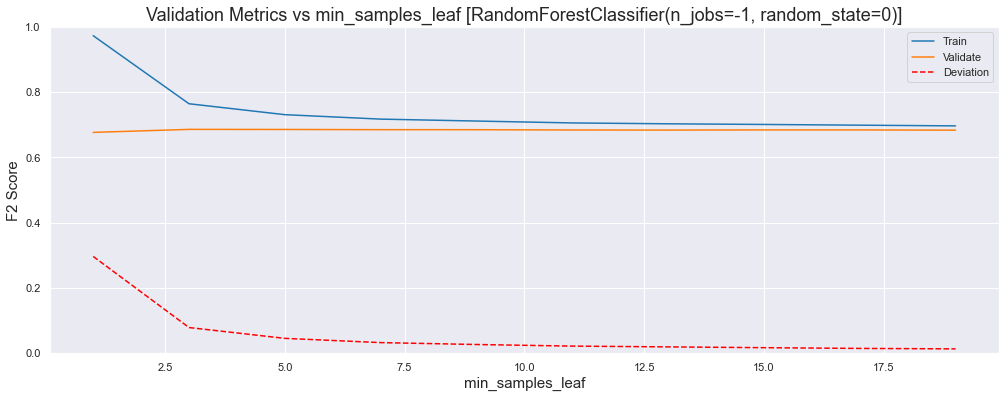

In [61]:
plot_validation_curve(rfc, X_train, y_train, param_name='min_samples_leaf', param_range=np.arange(1, 21, 2)) 


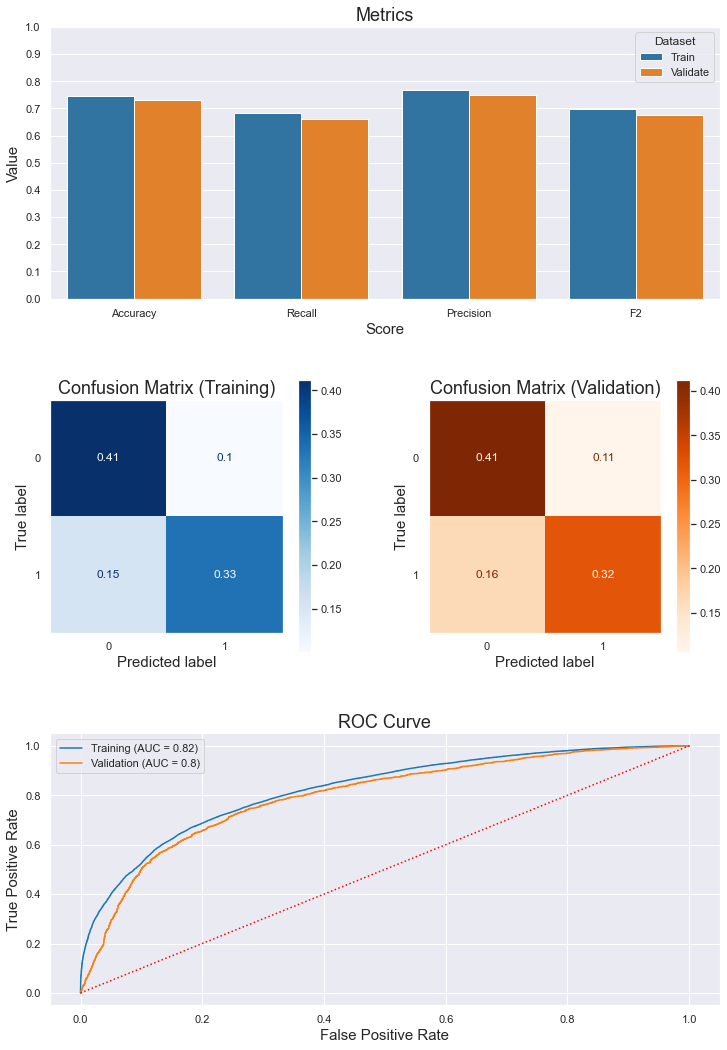

In [62]:
rfc_params = {'min_samples_leaf': np.arange(10, 100)}

rfc_grid = RandomizedSearchCV(rfc_base, 
                              rfc_params,
                              n_iter=20,
                              scoring=f2, 
                              n_jobs=-1)
rfc_grid.fit(X_train, y_train)
    
validate(rfc_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [63]:
rfc_bestMinSamplesLeaf = rfc_grid.best_estimator_
rfc_bestMinSamplesLeaf

RandomForestClassifier(min_samples_leaf=17, n_jobs=-1, random_state=0)

## Feature Importances from Random Forest Classifiers

In [64]:
from sklearn.inspection import permutation_importance

In [65]:
bestMaxDepth_feature_recall_scores = permutation_importance(rfc_bestMaxDepth, X_train, y_train, scoring='recall', n_repeats=10, random_state=0, n_jobs=-1)
bestMinSamplesLeaf_feature_recall_scores = permutation_importance(rfc_bestMinSamplesLeaf, X_train, y_train, scoring='recall', n_repeats=10, random_state=0, n_jobs=-1)

In [66]:
rfc_bestMaxDepth_impurity_importances = pd.Series(rfc_bestMaxDepth.feature_importances_, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_impurity_importances = pd.Series(rfc_bestMinSamplesLeaf.feature_importances_, index=X.columns).sort_values()

rfc_bestMaxDepth_permutation_importances = pd.Series(bestMaxDepth_feature_recall_scores.importances_mean, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_permutation_importances = pd.Series(bestMinSamplesLeaf_feature_recall_scores.importances_mean, index=X.columns).sort_values()

[Text(0.5, 0, 'Mean Decrease in Recall Score')]

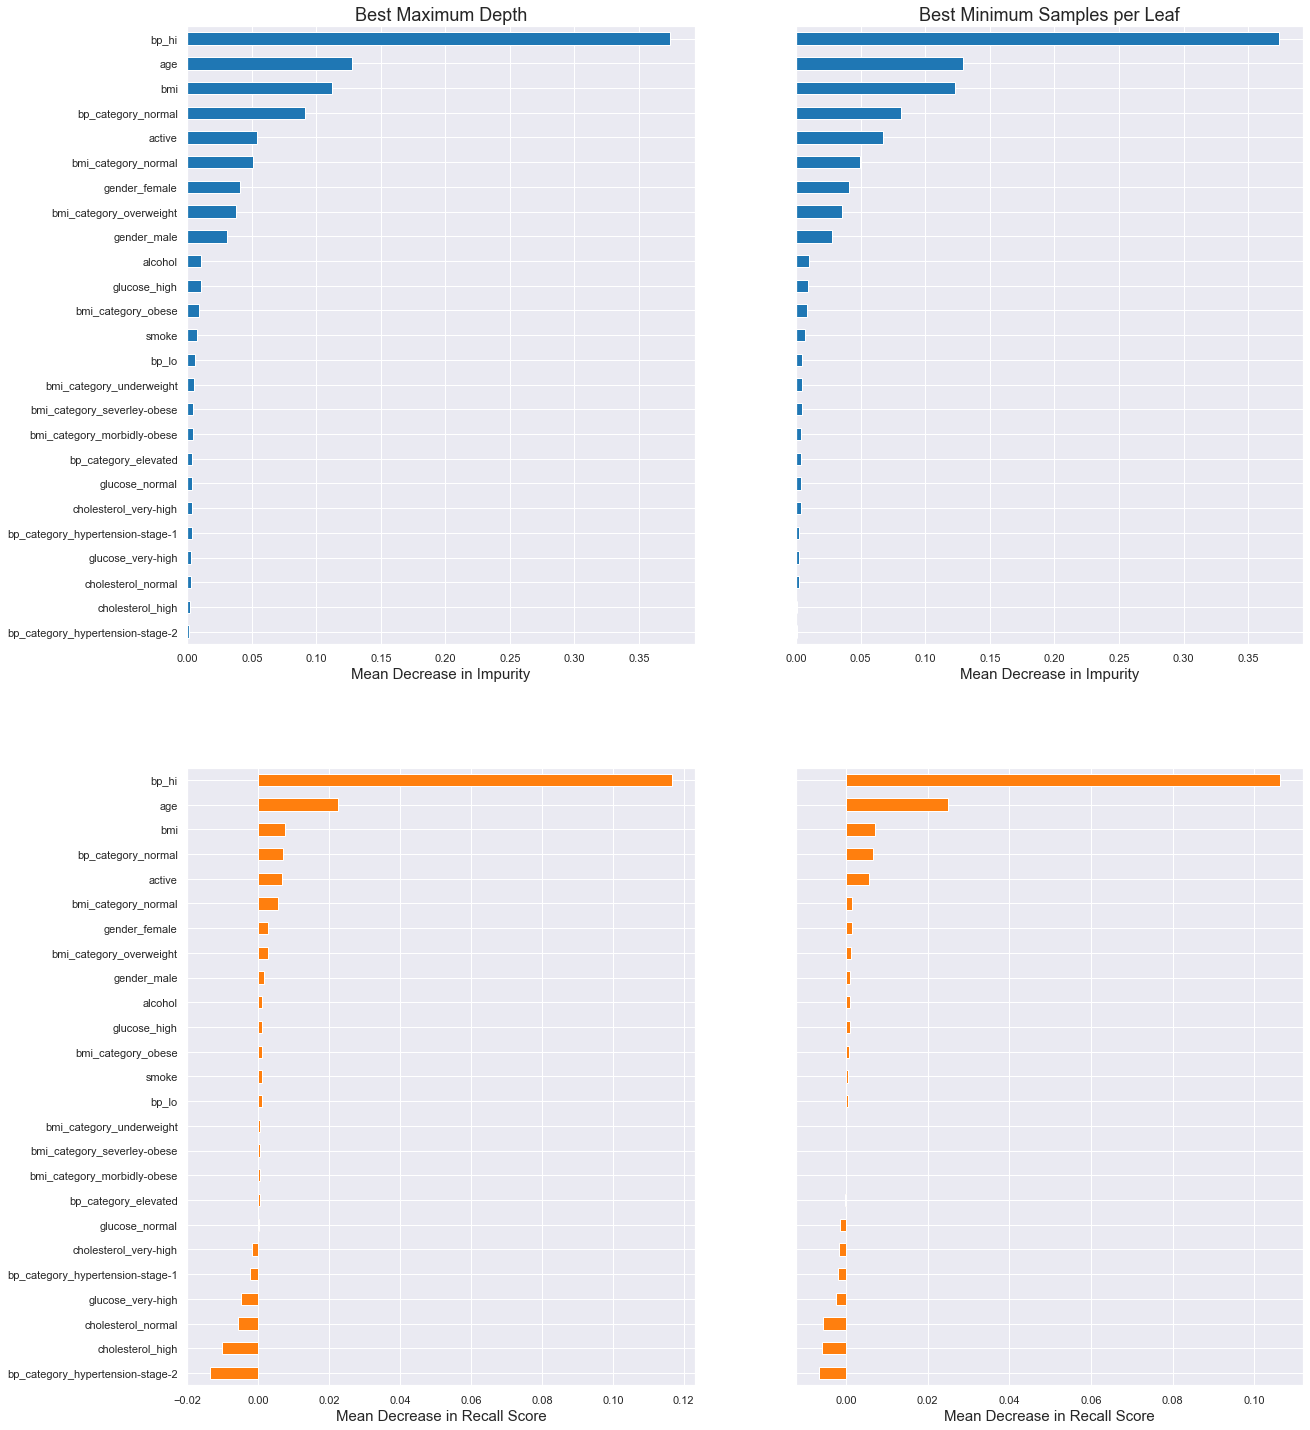

In [67]:
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 18
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,25), sharey=True)

rfc_bestMaxDepth_impurity_importances.plot(kind='barh', color='tab:blue', ax=axes[0][0])
rfc_bestMinSamplesLeaf_impurity_importances.plot(kind='barh', color='tab:blue', ax=axes[0][1])
rfc_bestMaxDepth_permutation_importances.plot(kind='barh', color='tab:orange', ax=axes[1][0])
rfc_bestMinSamplesLeaf_permutation_importances.plot(kind='barh', color='tab:orange', ax=axes[1][1])

axes[0][0].set(title='Best Maximum Depth', xlabel='Mean Decrease in Impurity')
axes[0][1].set(title='Best Minimum Samples per Leaf', xlabel='Mean Decrease in Impurity')
axes[1][0].set(xlabel='Mean Decrease in Recall Score')
axes[1][1].set(xlabel='Mean Decrease in Recall Score')

## Feature Processing Based on Importance

> *The permutation-based importances shown above indicate that some features are detrimental to the recall of the `rfc_bestMaxDepth` and `rfc_bestMinSamplesLeaf` classifiers, that is, their recall score actually improves when these columns are randomly permutated. Such features increase the rate of false negatives, the reduction of which is of primary concern for this model.*  

### *Feature Adjustment*

It can be concluded from the plots displaying impurity-based importances that the tree-based models implemented above are struggling to split the one-hot encoded features that were engineered in *Part C* (i.e. the `bmi_category` and `bp_category` columns) because they have too many levels. This, in turn, means that only a small fraction of the data belongs to some of these levels, and the corresponding one-hot encoded columns will mostly contain zeros. It follows that splitting on this column produces a relatively small reduction in impurity, causing the tree-based algorithms to ignore these columns in favor of others. To alleviate this, the levels belonging to `bmi_category` and `bp_category` will be grouped together in a way that maximizes the importance of each level.

> *In the figure above, it is obvious that the BMI levels need to be grouped such that the `severley-obese`, `morbidly-obese`, and `underweight` levels are eliminated, since they > are not providing any appreciable predictive power. As a result, the BMI levels will be grouped as:*
> - **`not-overweight` = {`underweight + normal`}**
> - **`overweight` = {`overweight`}**
> - **`obese` = {`obese + severley-obese + morbidly-obese`}**


In [68]:
X['bmi_category_not-overweight'] = X['bmi_category_underweight'] + X['bmi_category_normal']
X.drop(columns=['bmi_category_underweight', 'bmi_category_normal'], inplace=True)

In [69]:
X['bmi_category_obese'] = X['bmi_category_obese'] + X['bmi_category_severley-obese'] + X['bmi_category_morbidly-obese']
X.drop(columns=['bmi_category_severley-obese', 'bmi_category_morbidly-obese'], inplace=True)

> *Similarly, the figure above shows that the BP levels need to be grouped such that the `elevated`, and `hypertension-stage-2` levels are eliminated, since they too are not providing any appreciable predictive power. As a result, the BP levels will be grouped as:*
> - **`not-hypertensive` = {`normal` + `elevated`}**
> - **`hypertensive` = {`hypertension-stage-1` + `hypertension-stage-2`}**

> *The grouped columns above will be then merged into a single binary column called **`hypertension`**.*

In [70]:
X['bp_category_not-hypertensive'] = X['bp_category_normal'] + X['bp_category_elevated']
X.drop(columns=['bp_category_normal', 'bp_category_elevated'], inplace=True)

In [71]:
X['bp_category_hypertensive'] = X['bp_category_hypertension-stage-1'] + X['bp_category_hypertension-stage-2']
X.drop(columns=['bp_category_hypertension-stage-1', 'bp_category_hypertension-stage-2'], inplace=True)

In [72]:
X.drop(columns='bp_category_not-hypertensive', inplace=True)
X.rename(columns={'bp_category_hypertensive': 'hypertension'}, inplace=True)

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66513 entries, 0 to 66512
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          66513 non-null  int64  
 1   bp_hi                        66513 non-null  int64  
 2   bp_lo                        66513 non-null  int64  
 3   smoke                        66513 non-null  int64  
 4   alcohol                      66513 non-null  int64  
 5   active                       66513 non-null  int64  
 6   bmi                          66513 non-null  float64
 7   gender_female                66513 non-null  int64  
 8   gender_male                  66513 non-null  int64  
 9   cholesterol_high             66513 non-null  int64  
 10  cholesterol_normal           66513 non-null  int64  
 11  cholesterol_very-high        66513 non-null  int64  
 12  glucose_high                 66513 non-null  int64  
 13  glucose_normal  

### *Extracting the New Training, Testing, and Validation Sets*

In [74]:
X_train, X_validate_and_test, y_train, y_validate_and_test = train_test_split(X, y, random_state=0, test_size=0.20)
X_test, X_validate, y_test, y_validate = train_test_split(X_validate_and_test, y_validate_and_test, random_state=0, test_size=0.50)

In [75]:
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)
print(X_test.shape, y_test.shape)

(53210, 19) (53210,)
(6652, 19) (6652,)
(6651, 19) (6651,)


### *Normalizing the Adjusted Predictors*

In [76]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_validate = pd.DataFrame(scaler.transform(X_validate), columns=X_validate.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Fitting a Random Forest Classifier (*Iteration 2*)

### Optimizing the Maximum Depth (`max_depth`)

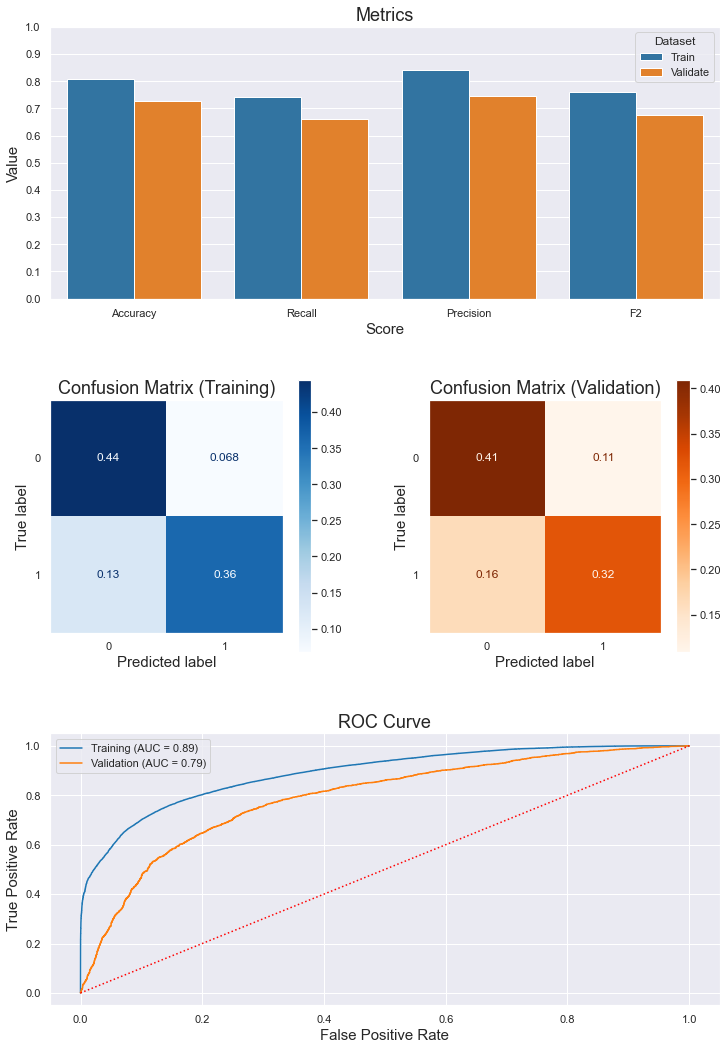

In [77]:
rfc_params = {'max_depth': np.arange(5, 16)}

rfc_grid = GridSearchCV(rfc, 
                        rfc_params,
                        scoring=f2, 
                        n_jobs=-1)
rfc_grid.fit(X_train, y_train)
    
validate(rfc_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [78]:
rfc_grid.best_estimator_


RandomForestClassifier(max_depth=15, n_jobs=-1, random_state=0)

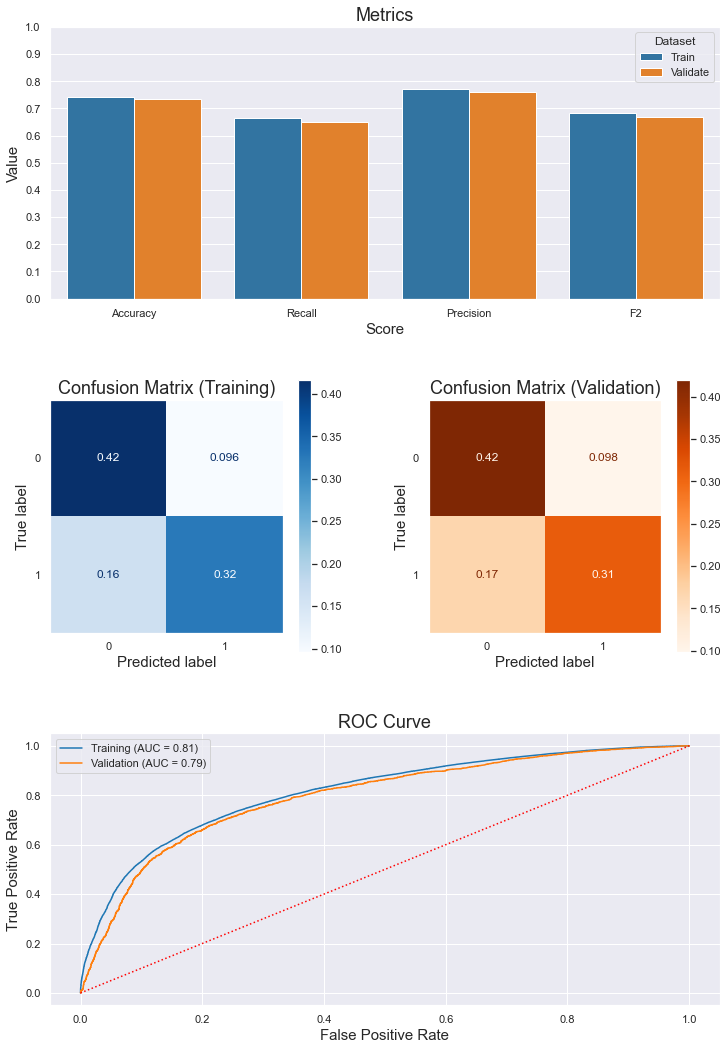

In [110]:
rfc.max_depth = 9
validate(rfc, X_train, X_validate, y_train, y_validate)


### Optimizing the Minimum Number of Samples per leaf (`min_samples_leaf`)

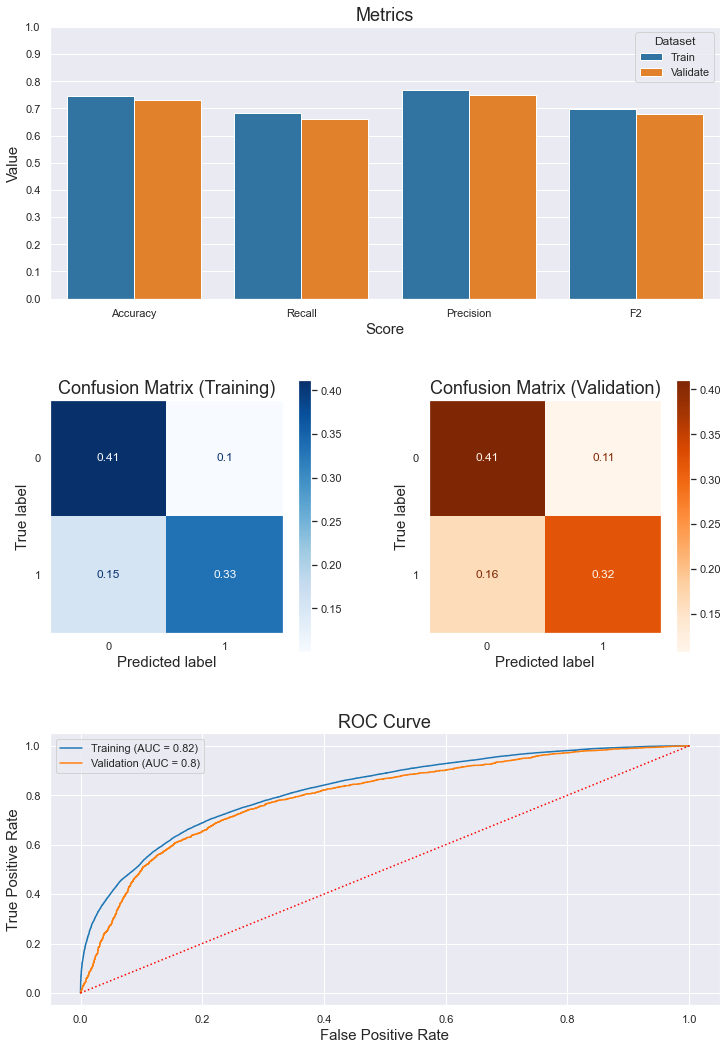

In [80]:
rfc_params = {'min_samples_leaf': min_samples_leaf_params}

rfc_grid = RandomizedSearchCV(rfc_base, 
                              rfc_params,
                              n_iter=50,
                              scoring=f2, 
                              n_jobs=-1)
rfc_grid.fit(X_train, y_train)
    
validate(rfc_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [108]:
rfc_bestMinSamplesLeaf

RandomForestClassifier(min_samples_leaf=17, n_jobs=-1, random_state=0)

## Updated Feature Importances

In [111]:
bestMaxDepth_feature_recall_scores = permutation_importance(rfc_bestMaxDepth, X_train, y_train, scoring='recall', n_repeats=10, random_state=0, n_jobs=-1)
bestMinSamplesLeaf_feature_recall_scores = permutation_importance(rfc_bestMinSamplesLeaf, X_train, y_train, scoring='recall', n_repeats=10, random_state=0, n_jobs=-1)

In [112]:
rfc_bestMaxDepth_impurity_importances = pd.Series(rfc_bestMaxDepth.feature_importances_, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_impurity_importances = pd.Series(rfc_bestMinSamplesLeaf.feature_importances_, index=X.columns).sort_values()

rfc_bestMaxDepth_permutation_importances = pd.Series(bestMaxDepth_feature_recall_scores.importances_mean, index=X.columns).sort_values()
rfc_bestMinSamplesLeaf_permutation_importances = pd.Series(bestMinSamplesLeaf_feature_recall_scores.importances_mean, index=X.columns).sort_values()

[Text(0.5, 0, 'Mean Decrease in Recall Score')]

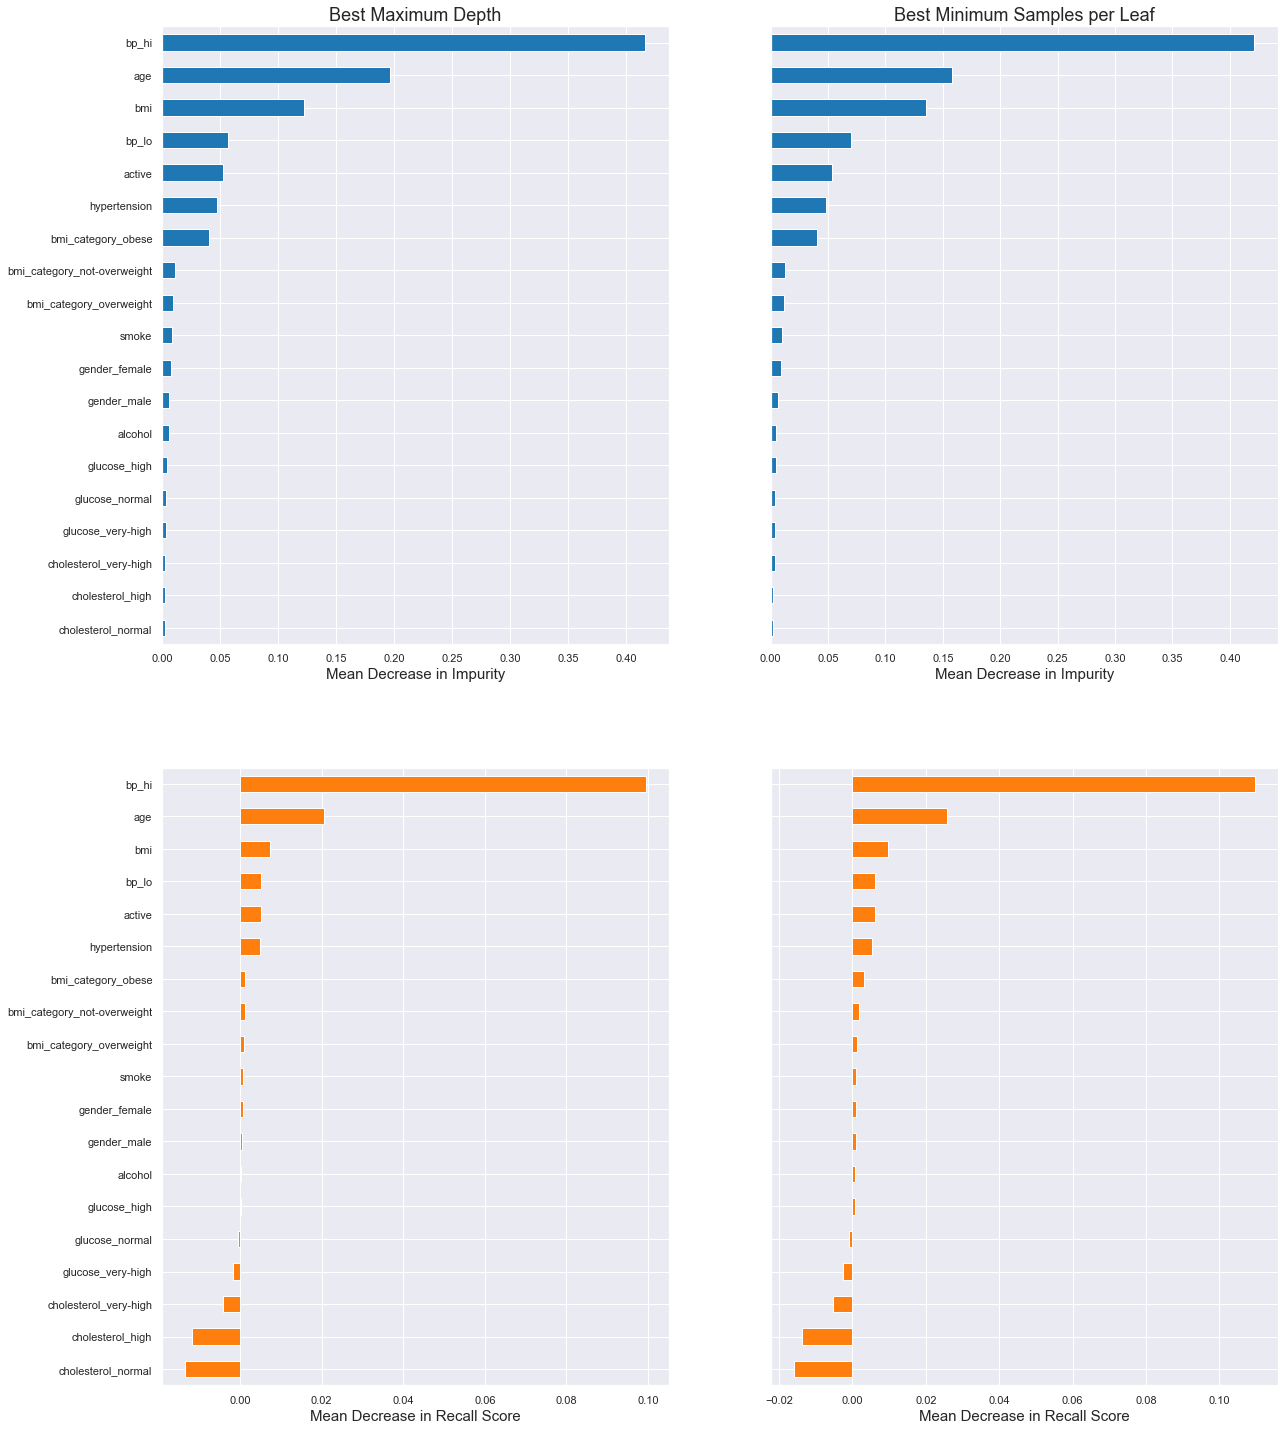

In [113]:
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 18
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,25), sharey=True)

rfc_bestMaxDepth_impurity_importances.plot(kind='barh', color='tab:blue', ax=axes[0][0])
rfc_bestMinSamplesLeaf_impurity_importances.plot(kind='barh', color='tab:blue', ax=axes[0][1])
rfc_bestMaxDepth_permutation_importances.plot(kind='barh', color='tab:orange', ax=axes[1][0])
rfc_bestMinSamplesLeaf_permutation_importances.plot(kind='barh', color='tab:orange', ax=axes[1][1])

axes[0][0].set(title='Best Maximum Depth', xlabel='Mean Decrease in Impurity')
axes[0][1].set(title='Best Minimum Samples per Leaf', xlabel='Mean Decrease in Impurity')
axes[1][0].set(xlabel='Mean Decrease in Recall Score')
axes[1][1].set(xlabel='Mean Decrease in Recall Score')

## Logistic Regression

In [82]:
logreg = LogisticRegression(solver='saga', random_state=0, max_iter=10_000)

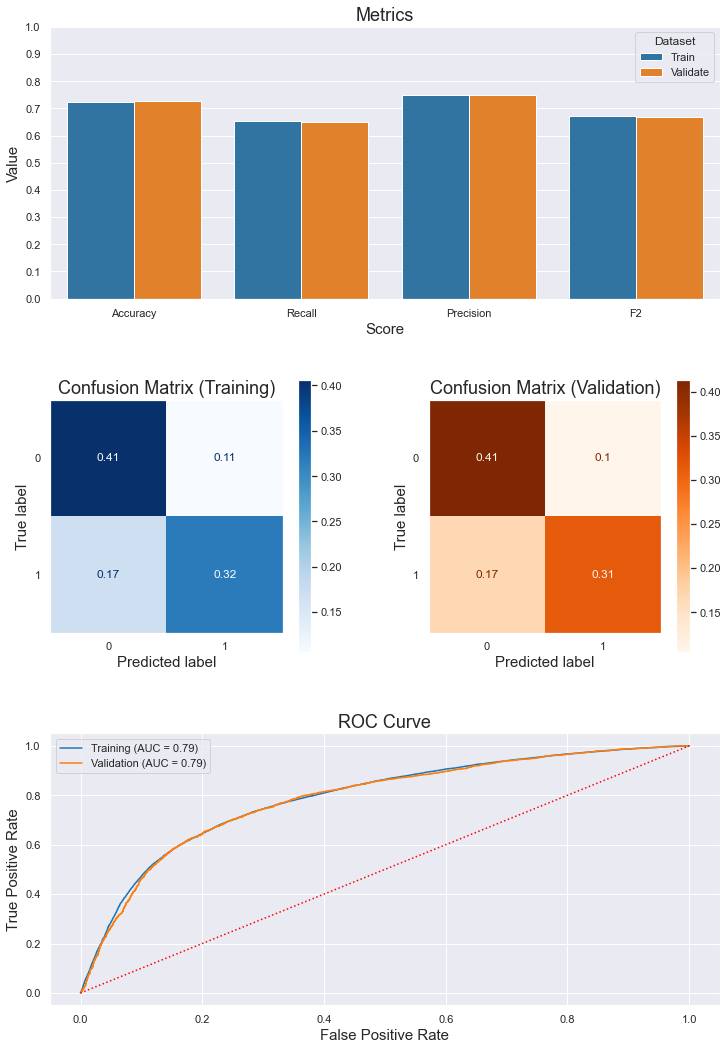

In [83]:
logreg_params = {'C': loguniform(1e-3, 1e3)}

logreg_grid = RandomizedSearchCV(logreg, 
                                 logreg_params, 
                                 n_iter=100, 
                                 scoring=f2, 
                                 n_jobs=-1)
logreg_grid.fit(X_train, y_train)
    
validate(logreg_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [84]:
logreg_grid.best_estimator_.C

0.0012834438709244094

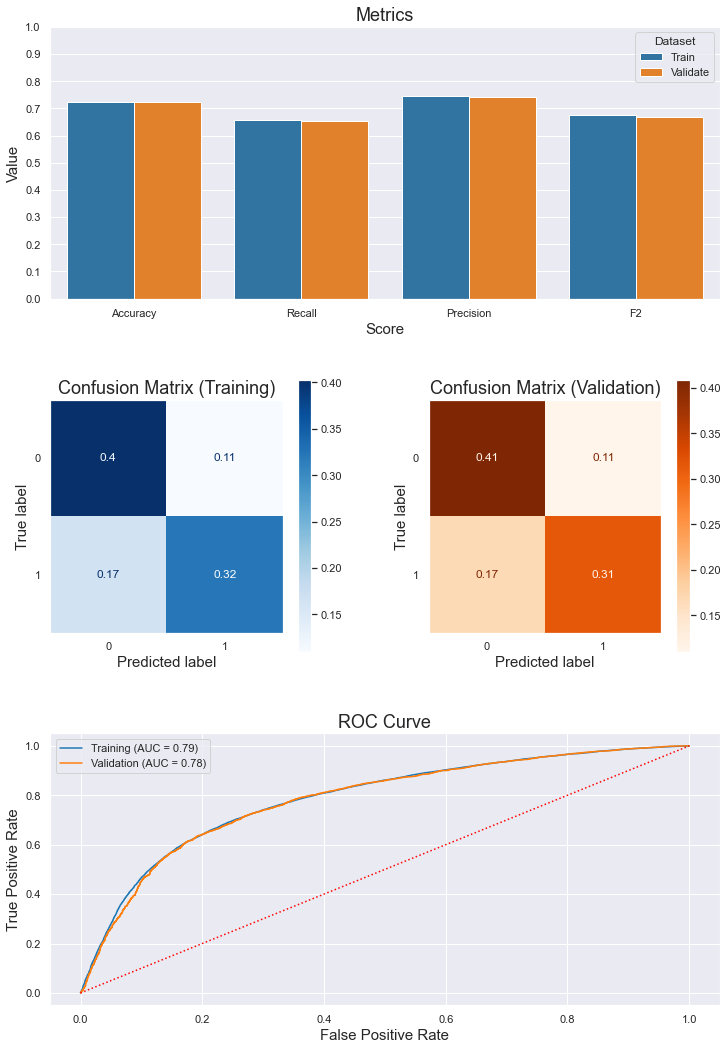

In [85]:
logreg_params = {'C': loguniform(1e-4, 1e-2)}

logreg_grid = RandomizedSearchCV(logreg, 
                           logreg_params,
                           n_iter=50, 
                           scoring=f2)
logreg_grid.fit(X_train, y_train)
    
validate(logreg_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [86]:
logreg_grid.best_estimator_.C

0.00032976542004339605

## K-Nearest Neighbors (KNN)

In [98]:
knn = KNeighborsClassifier(n_jobs=-1)

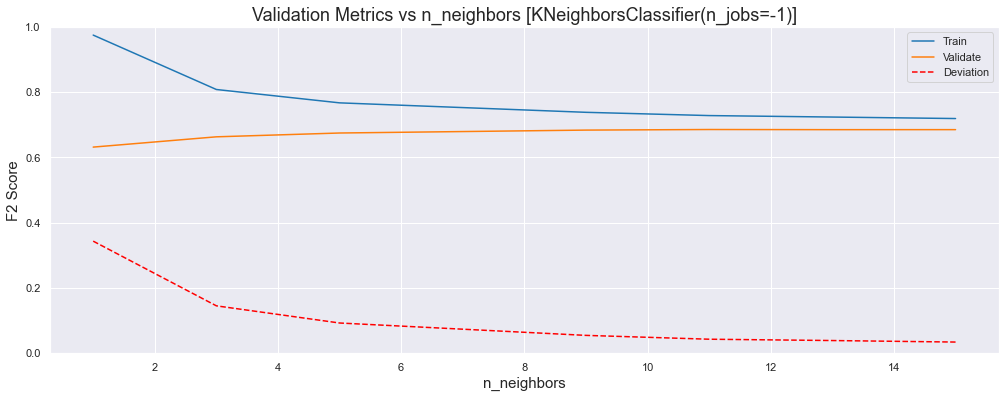

In [99]:
plot_validation_curve(knn, X_train, y_train, param_name='n_neighbors', param_range=[1, 3, 5, 9, 11, 13, 15]) 


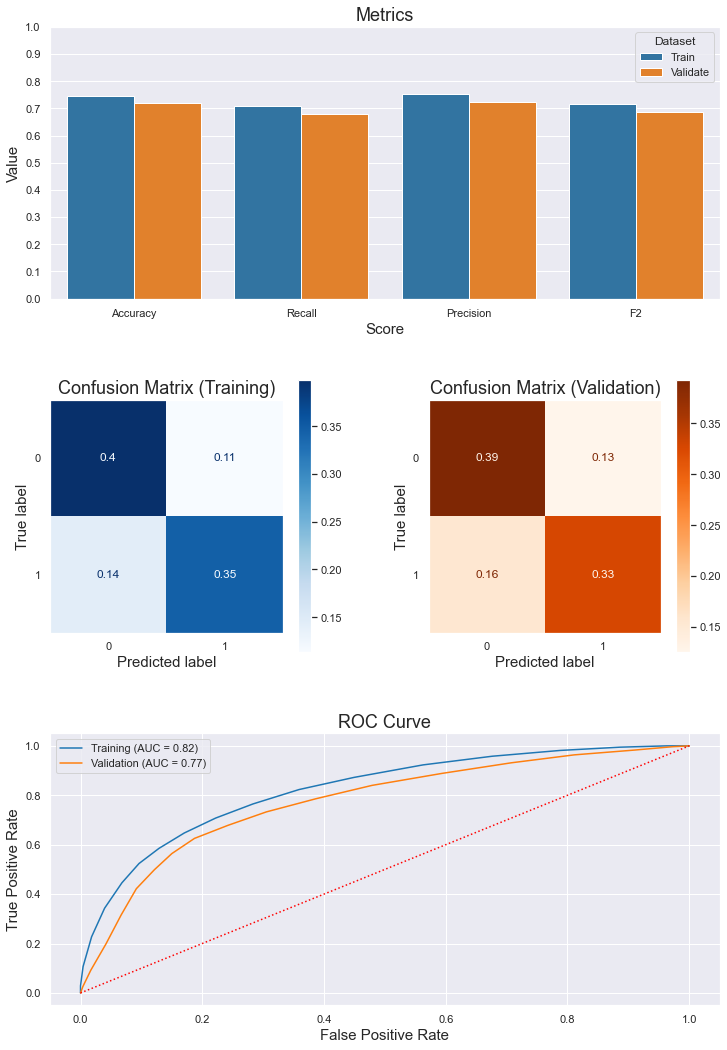

In [101]:
knn_params = {'n_neighbors': [11, 13, 15, 17, 19]}

knn_grid = GridSearchCV(knn, param_grid=knn_params, scoring=f2)
knn_grid.fit(X_train, y_train)

validate(knn_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

In [102]:
knn_grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'uniform'}

### *Bagging* 

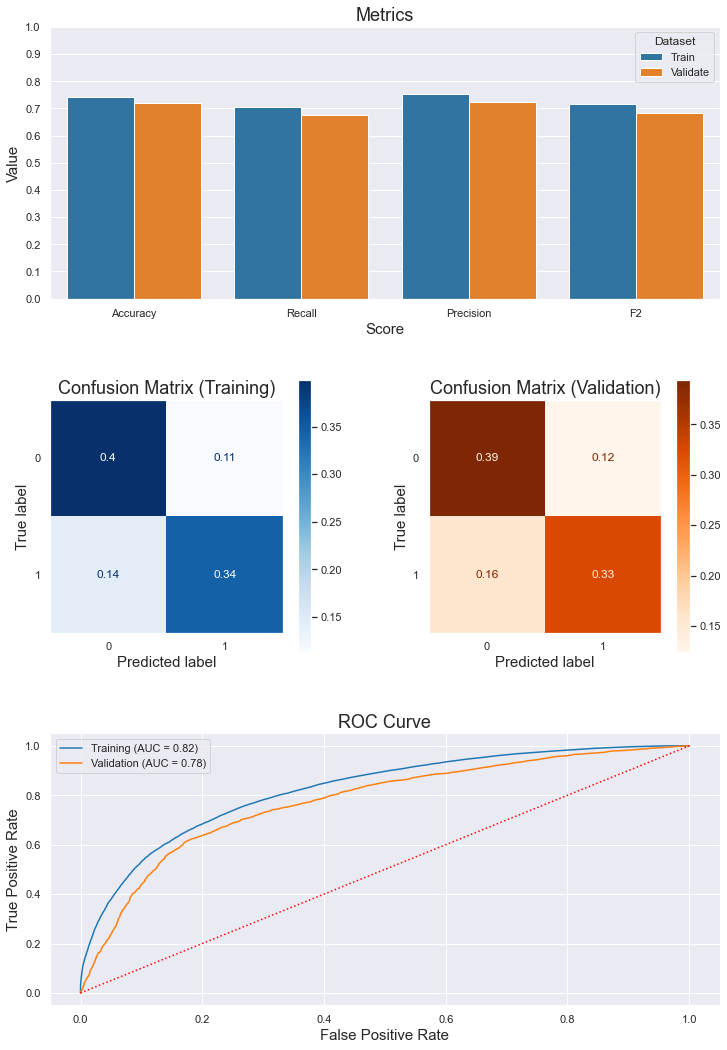

In [107]:
bagged_knn = BaggingClassifier(knn_grid.best_estimator_, random_state=0, n_jobs=-1)

bagged_knn_params = {'n_estimators': [10, 20, 30],
                     'max_samples': [0.5, 0.75, 1],
                     'max_features': [0.5, 0.75, 1],
                     'bootstrap_features': [True, False]}

bagged_knn_grid = GridSearchCV(bagged_knn,
                               bagged_knn_params,
                               scoring=f2,
                               n_jobs=-1)

validate(bagged_knn_grid.best_estimator_, X_train, X_validate, y_train, y_validate)

## Evaluating Models Against the Testing Set

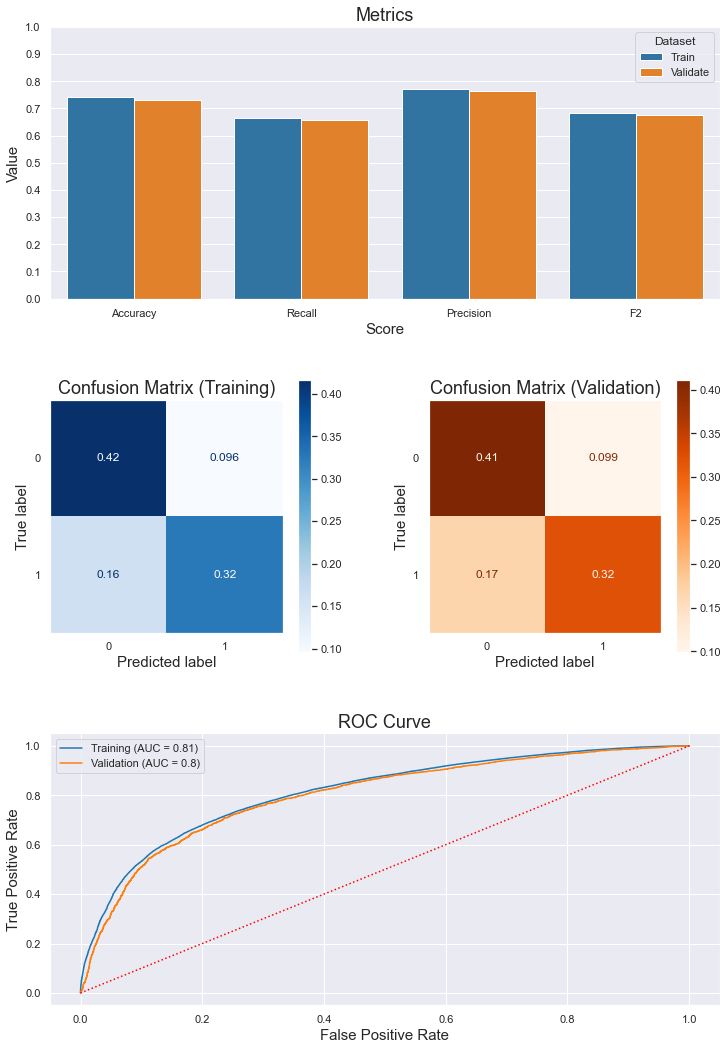

In [115]:
validate(rfc_bestMaxDepth, X_train, X_test, y_train, y_test)

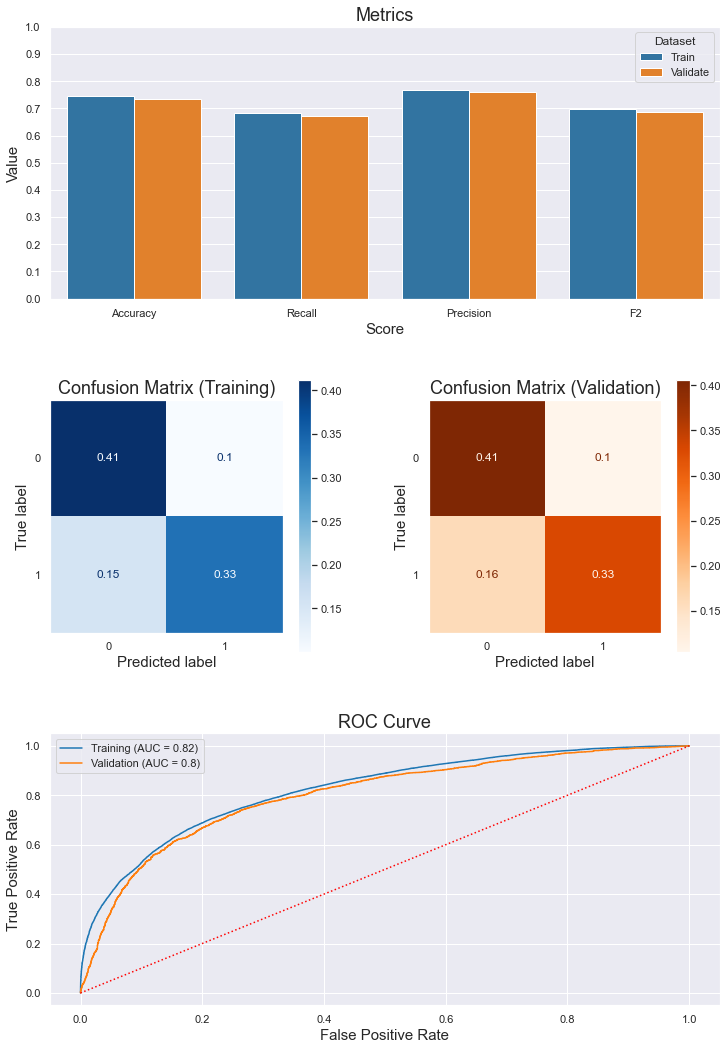

In [116]:
validate(rfc_bestMinSamplesLeaf, X_train, X_test, y_train, y_test)

In [117]:
validate(bagged_knn, X_train, X_test, y_train, y_test)